In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

In [2]:
df = pd.read_csv("crash-data-1.csv", na_values=["??","????"],delimiter=';')

# Understanding the data

In [3]:
df.head()

,tamainid,location_description,rdfeature,rdcharacter,rdclass,rdconfigur,rdsurface,rdcondition,lightcond,weather,trafcontrl,lat,lon,lon2,lat2,tract,zone,fatality,possblinj,numpassengers,numpedestrians,contrcir1_desc,contrcir2_desc,contrcir3_desc,contrcir4_desc,vehicle1,vehicle2,vehicle3,vehicle4,vehicle5,workarea,records,ta_date,ta_time,crash_date,geo_location,year,fatalities,injuries,month,contrfact1,contrfact2,contributing_factor,vehicleconcat1,vehicleconcat2,vehicleconcat3,vehicle_type
0,48493,15 FEET FROM US 64 HWY,FOUR-WAY INTERSECTION,"STRAIGHT,LEVEL",US ROUTE,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,STOP AND GO SIGNAL,NaN,NaN,-78.798201,35.738825,NaN,NaN,0,0,NaN,NaN,NONE,NaN,NONE,NaN,PASSENGER CAR,SPORT UTILITY,NaN,NaN,NaN,NO,20004,2021-07-29,9:22:13 AM,2021-07-29T13:22:13+00:00,NaN,2021,No,No,7,NONE,"NONE,NONE","NONE,NONE","PASSENGER CAR,SPORT UTILITY","PASSENGER CAR,SPORT UTILITY","PASSENGER CAR,SPORT UTILITY","PASSENGER CAR,SPORT UTILITY"
1,48494,0.2 MILES FROM SR 1300 (KILDAIRE FARM RD),NO SPECIAL FEATURE,"STRAIGHT,LEVEL",STATE SECONDARY ROUTE,"TWO-WAY,NOT DIVIDED",COARSE ASPHALT,DRY,DAYLIGHT,CLEAR,NO CONTROL PRESENT,NaN,NaN,-78.794249,35.706033,NaN,NaN,0,0,NaN,NaN,NONE,NaN,NONE,NaN,PASSENGER CAR,NaN,NaN,NaN,NaN,NO,20005,2021-07-30,1:19:48 PM,2021-07-30T17:19:48+00:00,NaN,2021,No,No,7,NONE,"NONE,NONE","NONE,NONE",PASSENGER CAR,PASSENGER CAR,PASSENGER CAR,PASSENGER CAR
2,48495,.25 MILES FROM US 64 HWY,NO SPECIAL FEATURE,"STRAIGHT,GRADE",US ROUTE,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,NO CONTROL PRESENT,35.738948,-78.798304,-78.796560,35.738490,P041,116.0,0,0,NaN,NaN,NONE,NaN,NONE,NaN,SPORT UTILITY,SPORT UTILITY,NaN,NaN,NaN,NO,20006,2021-07-30,10:00 AM,2021-07-30T14:00:00+00:00,"35.738948319, -78.79830394",2021,No,No,7,NONE,"NONE,NONE","NONE,NONE","SPORT UTILITY,SPORT UTILITY","SPORT UTILITY,SPORT UTILITY","SPORT UTILITY,SPORT UTILITY","SPORT UTILITY,SPORT UTILITY"
3,48500,CARY,NO SPECIAL FEATURE,"STRAIGHT,LEVEL",STATE SECONDARY ROUTE,"TWO-WAY,DIVIDED,POSITIVE MEDIAN BARRIER",SMOOTH ASPHALT,DRY,DAYLIGHT,CLOUDY,STOP AND GO SIGNAL,NaN,NaN,-78.782944,35.758003,NaN,NaN,0,1,NaN,NaN,NONE,NaN,NONE,NaN,PASSENGER CAR,PASSENGER CAR,NaN,NaN,NaN,NO,20011,2021-07-30,6:46:23 AM,2021-07-30T10:46:23+00:00,NaN,2021,No,Yes,7,NONE,"NONE,NONE","NONE,NONE","PASSENGER CAR,PASSENGER CAR","PASSENGER CAR,PASSENGER CAR","PASSENGER CAR,PASSENGER CAR","PASSENGER CAR,PASSENGER CAR"
4,48507,CARY,FOUR-WAY INTERSECTION,"STRAIGHT,BOTTOM (SAG)",STATE SECONDARY ROUTE,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,NO CONTROL PRESENT,NaN,NaN,-78.763900,35.788000,NaN,NaN,0,2,1.0,NaN,NaN,NaN,NONE,NaN,PASSENGER CAR,PASSENGER CAR,NaN,NaN,NaN,NO,20018,2021-07-23,5:17:12 PM,2021-07-23T21:17:12+00:00,NaN,2021,No,Yes,7,NaN,NONE,NONE,"PASSENGER CAR,PASSENGER CAR","PASSENGER CAR,PASSENGER CAR","PASSENGER CAR,PASSENGER CAR","PASSENGER CAR,PASSENGER CAR"


In [4]:
df.shape

(23482, 47)

In [5]:
df.describe()

,tamainid,lat,lon,lon2,lat2,zone,fatality,possblinj,numpassengers,numpedestrians,records,year,month
count,23482.000000,5301.000000,5301.000000,2.281100e+04,2.278300e+04,8025.000000,23482.000000,23482.000000,7462.000000,128.000000,23482.000000,23482.000000,23482.000000
mean,39850.213185,35.782044,-78.797822,-5.427472e+04,7.111843e+03,115.938692,0.001831,0.177625,1.816671,1.015625,11741.500000,2019.050677,6.467464
std,7191.867711,0.054735,0.084619,5.345997e+06,4.890084e+05,4.205345,0.043739,0.534334,2.521884,0.124507,6778.813847,1.551409,3.516530
min,27447.000000,35.552645,-79.229190,-7.877444e+08,-7.885800e+01,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2017.000000,1.000000
25%,33358.250000,35.757616,-78.848143,-7.881256e+01,3.575241e+01,113.000000,0.000000,0.000000,1.000000,1.000000,5871.250000,2018.000000,3.000000
50%,40221.500000,35.782303,-78.791876,-7.878303e+01,3.577180e+01,116.000000,0.000000,0.000000,1.000000,1.000000,11741.500000,2019.000000,6.000000
75%,46097.750000,35.807990,-78.766940,-7.876351e+01,3.579574e+01,119.000000,0.000000,0.000000,2.000000,1.000000,17611.750000,2020.000000,10.000000
max,51971.000000,36.065931,-78.268575,7.897055e+01,3.944381e+07,122.000000,2.000000,14.000000,111.000000,2.000000,23482.000000,2022.000000,12.000000


In [6]:
df.columns

Index(['tamainid', 'location_description', 'rdfeature', 'rdcharacter',
       'rdclass', 'rdconfigur', 'rdsurface', 'rdcondition', 'lightcond',
       'weather', 'trafcontrl', 'lat', 'lon', 'lon2', 'lat2', 'tract', 'zone',
       'fatality', 'possblinj', 'numpassengers', 'numpedestrians',
       'contrcir1_desc', 'contrcir2_desc', 'contrcir3_desc', 'contrcir4_desc',
       'vehicle1', 'vehicle2', 'vehicle3', 'vehicle4', 'vehicle5', 'workarea',
       'records', 'ta_date', 'ta_time', 'crash_date', 'geo_location', 'year',
       'fatalities', 'injuries', 'month', 'contrfact1', 'contrfact2',
       'contributing_factor', 'vehicleconcat1', 'vehicleconcat2',
       'vehicleconcat3', 'vehicle_type'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23482 entries, 0 to 23481
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tamainid              23482 non-null  int64  
 1   location_description  23479 non-null  object 
 2   rdfeature             22888 non-null  object 
 3   rdcharacter           22896 non-null  object 
 4   rdclass               22899 non-null  object 
 5   rdconfigur            22817 non-null  object 
 6   rdsurface             22908 non-null  object 
 7   rdcondition           22896 non-null  object 
 8   lightcond             22928 non-null  object 
 9   weather               22925 non-null  object 
 10  trafcontrl            22866 non-null  object 
 11  lat                   5301 non-null   float64
 12  lon                   5301 non-null   float64
 13  lon2                  22811 non-null  float64
 14  lat2                  22783 non-null  float64
 15  tract              

In [8]:
df.isna().sum()

tamainid                    0
location_description        3
rdfeature                 594
rdcharacter               586
rdclass                   583
rdconfigur                665
rdsurface                 574
rdcondition               586
lightcond                 554
weather                   557
trafcontrl                616
lat                     18181
lon                     18181
lon2                      671
lat2                      699
tract                   18330
zone                    15457
fatality                    0
possblinj                   0
numpassengers           16020
numpedestrians          23354
contrcir1_desc           3814
contrcir2_desc          23440
contrcir3_desc            679
contrcir4_desc          23404
vehicle1                  781
vehicle2                 3947
vehicle3                22330
vehicle4                23306
vehicle5                23447
workarea                  565
records                     0
ta_date                     0
ta_time   

Since missing value counts alone don't tell us the overall proportion of missing data, we'll calculate the percentage of missing values in each row. Then, we can drop columns with a high percentage of missing values.

In [9]:
df.isna().sum().sort_values(ascending=False) * 100. / len(df)

vehicle5                99.850950
contrcir2_desc          99.821140
contrcir4_desc          99.667831
numpedestrians          99.454902
vehicle4                99.250490
vehicle3                95.094115
tract                   78.059790
lon                     77.425262
geo_location            77.425262
lat                     77.425262
numpassengers           68.222468
zone                    65.824887
vehicle2                16.808619
contrcir1_desc          16.242228
contrfact1              16.242228
vehicle1                 3.325952
lat2                     2.976748
contrcir3_desc           2.891577
lon2                     2.857508
rdconfigur               2.831956
trafcontrl               2.623286
vehicleconcat1           2.576442
vehicleconcat2           2.576442
vehicleconcat3           2.576442
vehicle_type             2.576442
rdfeature                2.529597
rdcharacter              2.495528
rdcondition              2.495528
rdclass                  2.482753
contrfact2    

<Axes: >

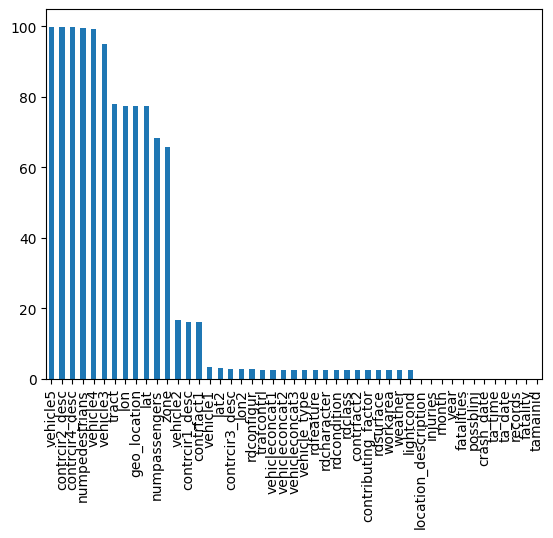

In [10]:
# Plotting a Pandas.Series data
missing_data = df.isna().sum().sort_values(ascending=False) * 100. / len(df)
missing_data.plot(kind='bar')

We want count of vehicles involve in accidents. Many values in vehicle2, vehicle3 are missing, it could mean that only one vehicle was involved in accident. Also in vehicle4 and vehicle5 99% values are missing so we will drop that columns.

We have enough info about data for now. Lets prepare the data for analysis

# Data preparation

1. Dropping irrelevant rows
2. Identifying duplicate
3. Renaming columns
4. Feture creation

In [11]:
df['vehicle1'] = df['vehicle1'].fillna(0)
df['vehicle2'] = df['vehicle2'].fillna(0)
df['vehicle3'] = df['vehicle3'].fillna(0)

In [12]:
df.isna().sum().sort_values(ascending=False) * 100. / len(df)

vehicle5                99.850950
contrcir2_desc          99.821140
contrcir4_desc          99.667831
numpedestrians          99.454902
vehicle4                99.250490
tract                   78.059790
geo_location            77.425262
lat                     77.425262
lon                     77.425262
numpassengers           68.222468
zone                    65.824887
contrfact1              16.242228
contrcir1_desc          16.242228
lat2                     2.976748
contrcir3_desc           2.891577
lon2                     2.857508
rdconfigur               2.831956
trafcontrl               2.623286
vehicleconcat1           2.576442
vehicleconcat2           2.576442
vehicleconcat3           2.576442
vehicle_type             2.576442
rdfeature                2.529597
rdcharacter              2.495528
rdcondition              2.495528
rdclass                  2.482753
contrfact2               2.474236
contributing_factor      2.465718
rdsurface                2.444426
workarea      

In [13]:
# Lets drop the unnecessary columns
columns_to_drop = ['contrfact1','contrfact2','contributing_factor','vehicleconcat1','vehicleconcat2','vehicleconcat3','numpassengers','numpedestrians','contrcir1_desc','contrcir2_desc','contrcir3_desc','contrcir4_desc',]
df = df.drop(columns=columns_to_drop)

In [14]:
df.columns

Index(['tamainid', 'location_description', 'rdfeature', 'rdcharacter',
       'rdclass', 'rdconfigur', 'rdsurface', 'rdcondition', 'lightcond',
       'weather', 'trafcontrl', 'lat', 'lon', 'lon2', 'lat2', 'tract', 'zone',
       'fatality', 'possblinj', 'vehicle1', 'vehicle2', 'vehicle3', 'vehicle4',
       'vehicle5', 'workarea', 'records', 'ta_date', 'ta_time', 'crash_date',
       'geo_location', 'year', 'fatalities', 'injuries', 'month',
       'vehicle_type'],
      dtype='object')

In [15]:
df.workarea.unique()


array(['NO', 'CONSTRUCTION WORK AREA', nan, 'MAINTENANCE WORK AREA',
       'UTILITY WORK AREA',
       'INTERMITTENT/MOVING WORK (E.G. PATCHING POTHO'], dtype=object)

In [16]:
columns_to_drop = ['vehicle4',
       'vehicle5','workarea']
df = df.drop(columns=columns_to_drop)

In [17]:
df.columns

Index(['tamainid', 'location_description', 'rdfeature', 'rdcharacter',
       'rdclass', 'rdconfigur', 'rdsurface', 'rdcondition', 'lightcond',
       'weather', 'trafcontrl', 'lat', 'lon', 'lon2', 'lat2', 'tract', 'zone',
       'fatality', 'possblinj', 'vehicle1', 'vehicle2', 'vehicle3', 'records',
       'ta_date', 'ta_time', 'crash_date', 'geo_location', 'year',
       'fatalities', 'injuries', 'month', 'vehicle_type'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23482 entries, 0 to 23481
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tamainid              23482 non-null  int64  
 1   location_description  23479 non-null  object 
 2   rdfeature             22888 non-null  object 
 3   rdcharacter           22896 non-null  object 
 4   rdclass               22899 non-null  object 
 5   rdconfigur            22817 non-null  object 
 6   rdsurface             22908 non-null  object 
 7   rdcondition           22896 non-null  object 
 8   lightcond             22928 non-null  object 
 9   weather               22925 non-null  object 
 10  trafcontrl            22866 non-null  object 
 11  lat                   5301 non-null   float64
 12  lon                   5301 non-null   float64
 13  lon2                  22811 non-null  float64
 14  lat2                  22783 non-null  float64
 15  tract              

In [19]:
# tamainid is uniqe key given to accident. Lets find duplicates.
df.loc[df.duplicated()]

,tamainid,location_description,rdfeature,rdcharacter,rdclass,rdconfigur,rdsurface,rdcondition,lightcond,weather,trafcontrl,lat,lon,lon2,lat2,tract,zone,fatality,possblinj,vehicle1,vehicle2,vehicle3,records,ta_date,ta_time,crash_date,geo_location,year,fatalities,injuries,month,vehicle_type


No duplicates are there. We can move further and rename columns.

In [20]:
df.columns

Index(['tamainid', 'location_description', 'rdfeature', 'rdcharacter',
       'rdclass', 'rdconfigur', 'rdsurface', 'rdcondition', 'lightcond',
       'weather', 'trafcontrl', 'lat', 'lon', 'lon2', 'lat2', 'tract', 'zone',
       'fatality', 'possblinj', 'vehicle1', 'vehicle2', 'vehicle3', 'records',
       'ta_date', 'ta_time', 'crash_date', 'geo_location', 'year',
       'fatalities', 'injuries', 'month', 'vehicle_type'],
      dtype='object')

In [21]:
# Rename our columns
df = df.rename(columns={
    'tamainid': 'Id',
    'location_description': 'Location description',
    'rdfeature': 'Road dfeature',
    'rdcharacter': 'Road character',
    'rdclass': 'Road class',
    'rdconfigur': 'Road configur',
    'rdsurface': 'Road surface',
    'rdcondition': 'Road condition',
    'lightcond': 'Light condition',
    'weather': 'Weather',
    'trafcontrl': 'Traffic control',
    'lat': 'Lat',
    'lon': 'Lon',
    'lon2': 'Lon 2',
    'lat2': 'Lat 2',
    'tract': 'Tract',
    'zone': 'Zone',
    'fatality': 'Fatality',
    'possblinj': 'Possble injuries',
    'vehicle1': 'Vehicle1',
    'vehicle2': 'Vehicle2',
    'vehicle3': 'Vehicle3',
    'records': 'Records',
    'ta_date': 'Date',
    'ta_time': 'Time',
    'crash_date': 'Crash date',
    'geo_location': 'Geo location',
    'year': 'Year',
    'fatalities': 'Fatalities',
    'injuries': 'Injuries',
    'month': 'Month',
    'vehicle_type': 'Vehicle type'
})

In [22]:
df.head()

,Id,Location description,Road dfeature,Road character,Road class,Road configur,Road surface,Road condition,Light condition,Weather,Traffic control,Lat,Lon,Lon 2,Lat 2,Tract,Zone,Fatality,Possble injuries,Vehicle1,Vehicle2,Vehicle3,Records,Date,Time,Crash date,Geo location,Year,Fatalities,Injuries,Month,Vehicle type
0,48493,15 FEET FROM US 64 HWY,FOUR-WAY INTERSECTION,"STRAIGHT,LEVEL",US ROUTE,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,STOP AND GO SIGNAL,NaN,NaN,-78.798201,35.738825,NaN,NaN,0,0,PASSENGER CAR,SPORT UTILITY,0,20004,2021-07-29,9:22:13 AM,2021-07-29T13:22:13+00:00,NaN,2021,No,No,7,"PASSENGER CAR,SPORT UTILITY"
1,48494,0.2 MILES FROM SR 1300 (KILDAIRE FARM RD),NO SPECIAL FEATURE,"STRAIGHT,LEVEL",STATE SECONDARY ROUTE,"TWO-WAY,NOT DIVIDED",COARSE ASPHALT,DRY,DAYLIGHT,CLEAR,NO CONTROL PRESENT,NaN,NaN,-78.794249,35.706033,NaN,NaN,0,0,PASSENGER CAR,0,0,20005,2021-07-30,1:19:48 PM,2021-07-30T17:19:48+00:00,NaN,2021,No,No,7,PASSENGER CAR
2,48495,.25 MILES FROM US 64 HWY,NO SPECIAL FEATURE,"STRAIGHT,GRADE",US ROUTE,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,NO CONTROL PRESENT,35.738948,-78.798304,-78.796560,35.738490,P041,116.0,0,0,SPORT UTILITY,SPORT UTILITY,0,20006,2021-07-30,10:00 AM,2021-07-30T14:00:00+00:00,"35.738948319, -78.79830394",2021,No,No,7,"SPORT UTILITY,SPORT UTILITY"
3,48500,CARY,NO SPECIAL FEATURE,"STRAIGHT,LEVEL",STATE SECONDARY ROUTE,"TWO-WAY,DIVIDED,POSITIVE MEDIAN BARRIER",SMOOTH ASPHALT,DRY,DAYLIGHT,CLOUDY,STOP AND GO SIGNAL,NaN,NaN,-78.782944,35.758003,NaN,NaN,0,1,PASSENGER CAR,PASSENGER CAR,0,20011,2021-07-30,6:46:23 AM,2021-07-30T10:46:23+00:00,NaN,2021,No,Yes,7,"PASSENGER CAR,PASSENGER CAR"
4,48507,CARY,FOUR-WAY INTERSECTION,"STRAIGHT,BOTTOM (SAG)",STATE SECONDARY ROUTE,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,NO CONTROL PRESENT,NaN,NaN,-78.763900,35.788000,NaN,NaN,0,2,PASSENGER CAR,PASSENGER CAR,0,20018,2021-07-23,5:17:12 PM,2021-07-23T21:17:12+00:00,NaN,2021,No,Yes,7,"PASSENGER CAR,PASSENGER CAR"


# Visualisation

In [23]:
road_class_counts = df['Road class'].value_counts().sort_index()
print(road_class_counts)

Road class
INTERSTATE                107
LOCAL STREET             3420
NC ROUTE                 1247
OTHER *                    10
PRIVATE ROAD,DRIVEWAY     173
PUBLIC VEHICULAR AREA    6112
STATE SECONDARY ROUTE    9184
US ROUTE                 2646
Name: count, dtype: int64


[]

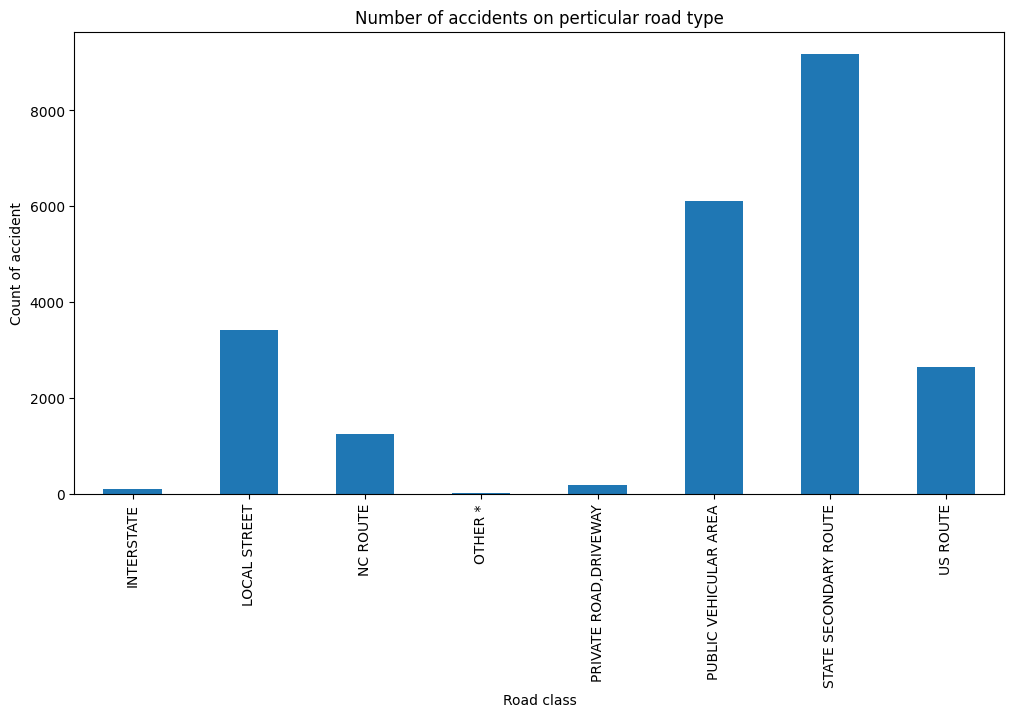

In [24]:
plt.figure(figsize=(12, 6))
rx = road_class_counts.plot(kind='bar',title='Number of accidents on perticular road type')
rx.set_xlabel('Road class')
rx.set_ylabel('Count of accident')
plt.plot()

C:\Users\yasha\AppData\Local\Temp\ipykernel_1752\148807722.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(road_class_counts)


<Axes: xlabel='count', ylabel='Density'>

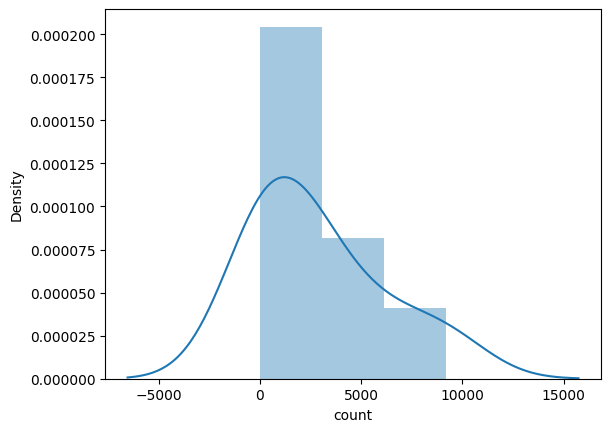

In [25]:
sns.distplot(road_class_counts)

In [26]:
road_config_counts = df['Road configur'].value_counts()
print(road_config_counts)

Road configur
TWO-WAY,NOT DIVIDED                        11620
TWO-WAY,DIVIDED,UNPROTECTED MEDIAN          6574
TWO-WAY,DIVIDED,POSITIVE MEDIAN BARRIER     3133
ONE-WAY,NOT DIVIDED                         1449
UNKNOWN                                       41
Name: count, dtype: int64


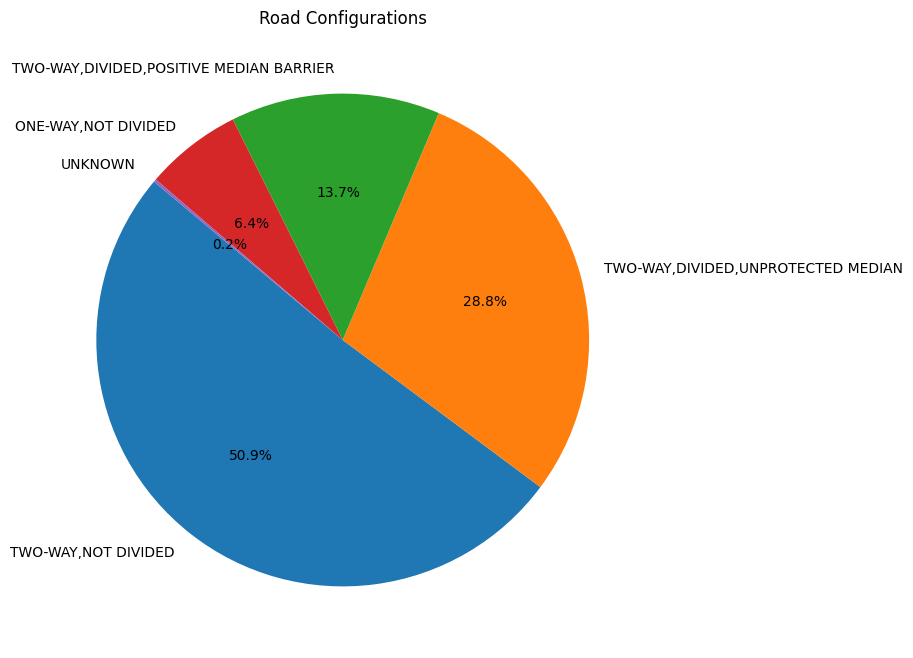

In [27]:
plt.figure(figsize=(8, 8))
plt.pie(road_config_counts, labels=road_config_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Road Configurations')
plt.show()

Undivided roads contribute most to accidents. Consider road safety measures like lane dividers and guardrails.

In [28]:
df.columns

Index(['Id', 'Location description', 'Road dfeature', 'Road character',
       'Road class', 'Road configur', 'Road surface', 'Road condition',
       'Light condition', 'Weather', 'Traffic control', 'Lat', 'Lon', 'Lon 2',
       'Lat 2', 'Tract', 'Zone', 'Fatality', 'Possble injuries', 'Vehicle1',
       'Vehicle2', 'Vehicle3', 'Records', 'Date', 'Time', 'Crash date',
       'Geo location', 'Year', 'Fatalities', 'Injuries', 'Month',
       'Vehicle type'],
      dtype='object')

C:\Users\yasha\AppData\Local\Temp\ipykernel_1752\919287061.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


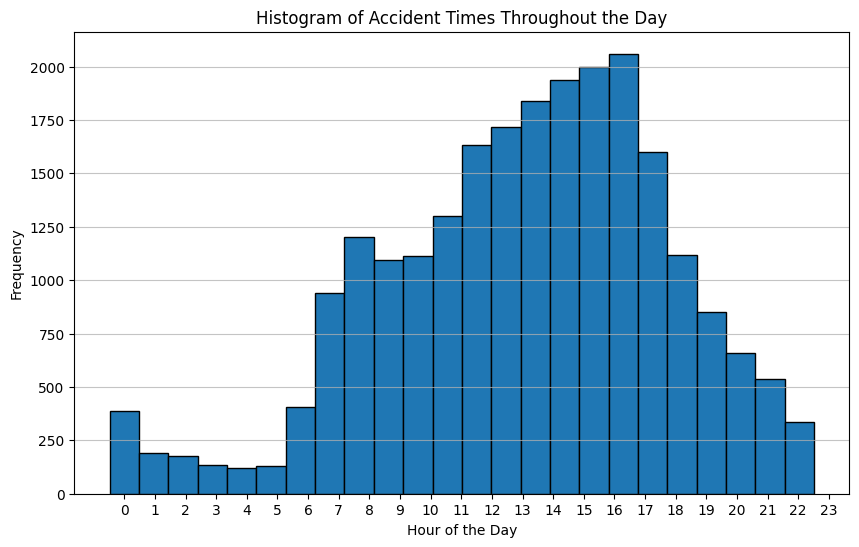

In [29]:
# Convert ' Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Create a histogram of accident times
plt.figure(figsize=(10, 6))
plt.hist(df['Time'].dt.hour, bins=24, edgecolor='black', align='left')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Histogram of Accident Times Throughout the Day')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.75)
plt.show()

Daytime accidents are most frequent, peaking in late afternoon/evening (rush hour and dusk factors).

In [31]:
Traffic_control	 = df['Traffic control'].value_counts().sort_index()
print(Traffic_control)


Traffic control
DOUBLE YELLOW LINE, NO PASSING ZONE       50
FLASHING SIGNAL WITH STOP SIGN             7
FLASHING SIGNAL WITHOUT STOP SIGN          5
FLASHING STOP AND GO SIGNAL              178
HUMAN CONTROL                             22
NO CONTROL PRESENT                     13877
OTHER *                                   49
RR GATE AND FLASHER                       33
SCHOOL ZONE SIGNS                          5
STOP AND GO SIGNAL                      6324
STOP SIGN                               2050
WARNING SIGN                              12
YIELD SIGN                               254
Name: count, dtype: int64


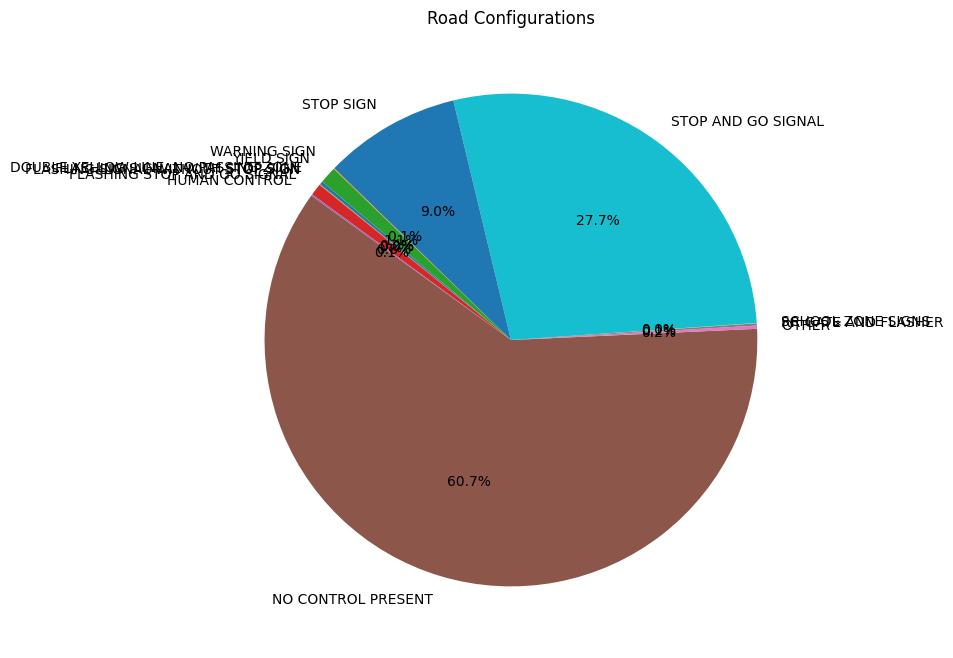

In [32]:
plt.figure(figsize=(8, 8))
plt.pie(Traffic_control, labels=Traffic_control.index, autopct='%1.1f%%', startangle=140)
plt.title('Road Configurations')
plt.show()

Most of the accidents happend when no traffic control signal was there

In [33]:
Weather	 = df['Weather'].value_counts().sort_index()
print(Weather)


Weather
BLOWING SAND, DIRT, SNOW                  2
CLEAR                                 17763
CLOUDY                                 2922
FOG, SMOG, SMOKE                         19
OTHER *                                  37
RAIN                                   2087
SEVERE CROSSWINDS                         3
SLEET, HAIL, FREEZING RAIN/DRIZZLE       37
SNOW                                     55
Name: count, dtype: int64


[]

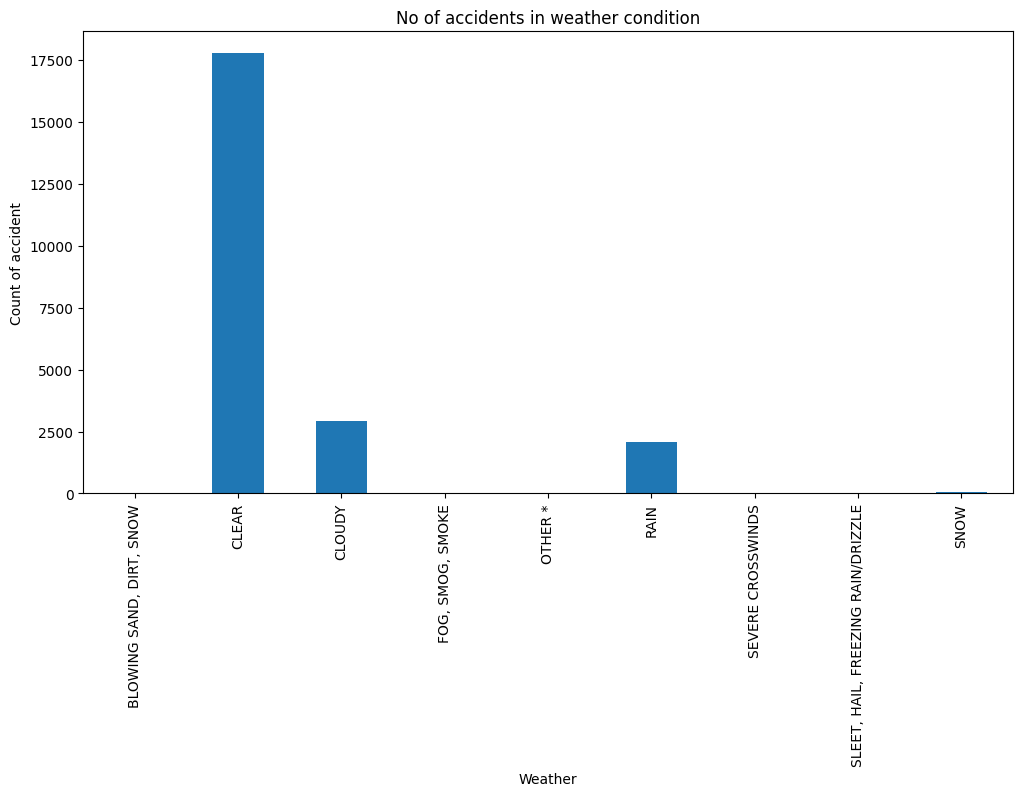

In [34]:
plt.figure(figsize=(12, 6))
rx = Weather.plot(kind='bar',title='No of accidents in weather condition')
rx.set_xlabel('Weather')
rx.set_ylabel('Count of accident')
plt.plot()

In [35]:
Light_condition	 = df['Light condition'].value_counts().sort_index()
print(Light_condition)

Light condition
DARK - LIGHTED ROADWAY         3300
DARK - ROADWAY NOT LIGHTED      743
DARK - UNKNOWN LIGHTING          60
DAWN                            177
DAYLIGHT                      17903
DUSK                            570
OTHER *                           1
UNKNOWN                         174
Name: count, dtype: int64


In [36]:
Road_surface = df['Road surface'].value_counts().sort_index()
print(Road_surface)

Road surface
COARSE ASPHALT       2981
CONCRETE              721
GRAVEL                 47
GROOVED CONCRETE      384
OTHER *                13
SAND                    3
SMOOTH ASPHALT      18749
SOIL                   10
Name: count, dtype: int64


In [41]:
# Segregating accidents on the basis of severity
severe_accidents_4 = df[df.Fatality==4].value_counts()
severe_accidents_3 = df[df.Fatality==3].value_counts()
severe_accidents_2 = df[df.Fatality==2].value_counts()
severe_accidents_1 = df[df.Fatality==1].value_counts()

C:\Users\yasha\AppData\Local\Temp\ipykernel_1752\1942713946.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  c = sns.countplot(x="Year", data=df, orient = 'v', palette = "crest")


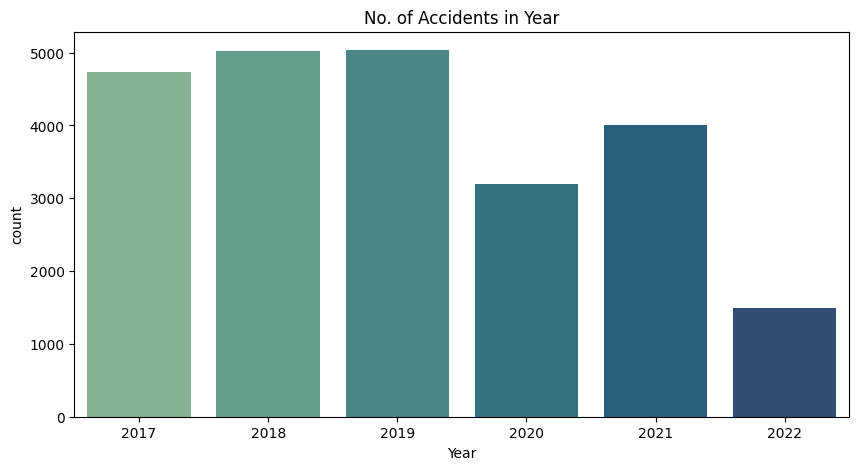

In [48]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Year", data=df, orient = 'v', palette = "crest")
plt.annotate('Data Not Available',xy=(-0.4,500000), fontsize=11)
c.set_title("No. of Accidents in Year")
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.60
    y = i.get_height()+10000
    ax.annotate(count, (x, y))
plt.show()

Number of accidents appears to have declined over the six years between 2017 and and 2022.